# PROJECT DEFINITION

A project to predict wether a person in certain African countries has a bank account or not

# DATA PREPROCESSING/PREPARATION

In [9]:
# IMPORTING NEEDED LIBRARIES
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [10]:
# LOADING THE DATASET AND ITS DESCRIPTIONS
bank = pd.read_csv('Train.csv', encoding = 'utf-8')
des = pd.read_csv('VariableDefinitions.csv', encoding = 'utf-8')

In [11]:
bank.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [12]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("max_colwidth", None)

des.head(14)

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,"The interviewee’s relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know"
9,marital_status,"The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don’t know"


In [13]:
bank.shape

(23524, 13)

CHECKING OUT THE DATASET


I want to check out each column of the dataset to know if they have missing values or any other inconsistencies that needs fixing.
To do this I'll check for each column:
1. If they have missing values
2. If there are inconsistent values by checking the unique values of each column


In [14]:
bank.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [15]:
# CHECKING FOR MISSING VALUES
bank.isnull().sum()

,0
country,0
year,0
uniqueid,0
bank_account,0
location_type,0
cellphone_access,0
household_size,0
age_of_respondent,0
gender_of_respondent,0
relationship_with_head,0


In [16]:
for i in bank.columns:
    #print(i)
    if i != "uniqueid":
      print(bank[i].value_counts())
      print('\n')

country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: count, dtype: int64


year
2016    8735
2018    8169
2017    6620
Name: count, dtype: int64


bank_account
No     20212
Yes     3312
Name: count, dtype: int64


location_type
Rural    14343
Urban     9181
Name: count, dtype: int64


cellphone_access
Yes    17454
No      6070
Name: count, dtype: int64


household_size
2     5229
3     3920
4     3474
1     3057
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
15      11
14      10
16       4
21       1
18       1
17       1
20       1
Name: count, dtype: int64


age_of_respondent
30     1056
35      836
25      792
28      748
32      715
40      685
20      626
26      615
23      588
18      585
27      570
22      568
45      564
24      562
38      554
33      527
34      522
29      517
17      477
21      471
19      470
31      467
16      462
36      460
42      450
50      448
37      434
39      3

CHECKING OUT AND DROPPING THE DUPLICATE COLUMNS

In [17]:
duplicates = bank[bank['uniqueid'].duplicated(keep = False)]
print(len(duplicates))

21409


In [18]:
display(bank[bank.duplicated(keep=False, subset=None)])

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type


In [19]:
# Removing the unique id column because it'll have no value in the perdiction or analysis
bank = bank.drop('uniqueid', axis = 1)

In [20]:
bank.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


CONCLUSION:
1. This data doesn't seem to have any missing values
2. The dataset was collected within 3 years(2016, 2017, 2018)
3. I thought the data contains duplicates because unique id has duplicates, but on closer look, I realized it was not duplicates.(Its just that unique Id are sometimes repeated for different countries.
4. From the bank account column i noticed that most of the respondents do not have a bank account
5. There were more female than male respondents

# EXPLORATORY DATA ANALYSIS

I'll analyze this data in 3 ways
1. I'll analyze the distribution of the dataset with histograms(Numerical variables) and bar charts(Categorical variables)
2. I'll analyze the relationship of each pair of variables of the data with each other(heatmap). I am interested in seeing which feature majorly affects the possibility of someone having a bank account
3. I'll analyze the relationship of each variable with the target variable('bank account'), using grouped bar charts

In [21]:
# DIVIDING THE DATSET INTO NUMERICAL AND CATEGORICAL
Numerical = pd.DataFrame({'household_size' : bank['household_size'], 'age_of_respondent' : bank['age_of_respondent']})
Categorical = bank.drop(['household_size', 'age_of_respondent'], axis = 1)
Target = bank['bank_account']

## DATA DISTRIBUTION ANALYSIS

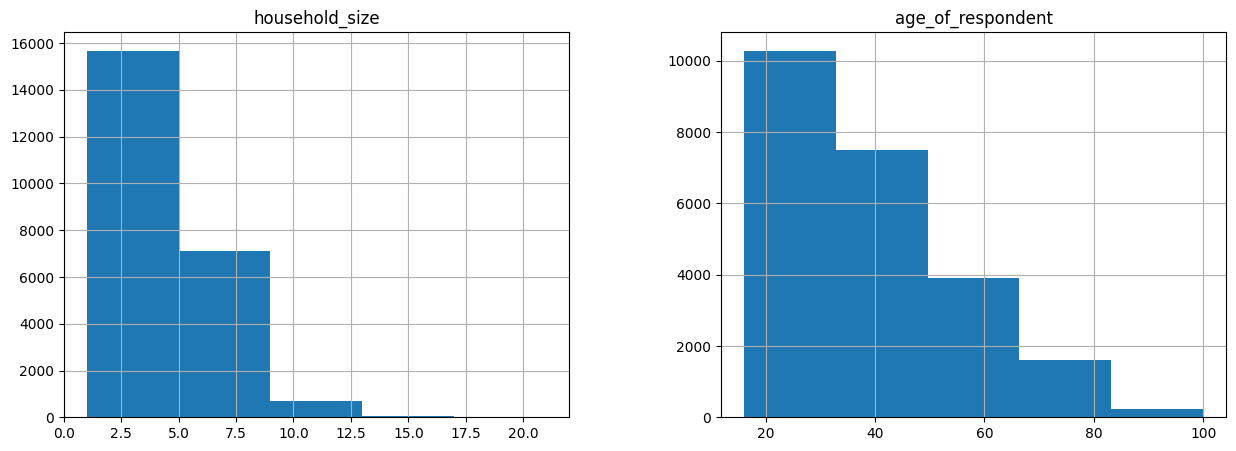

In [22]:
# Numerial data distribution
Numerical.hist(figsize=(15, 5), bins = 5)
plt.show()

In [23]:
Categorical['year'] = Categorical['year'].astype('category')

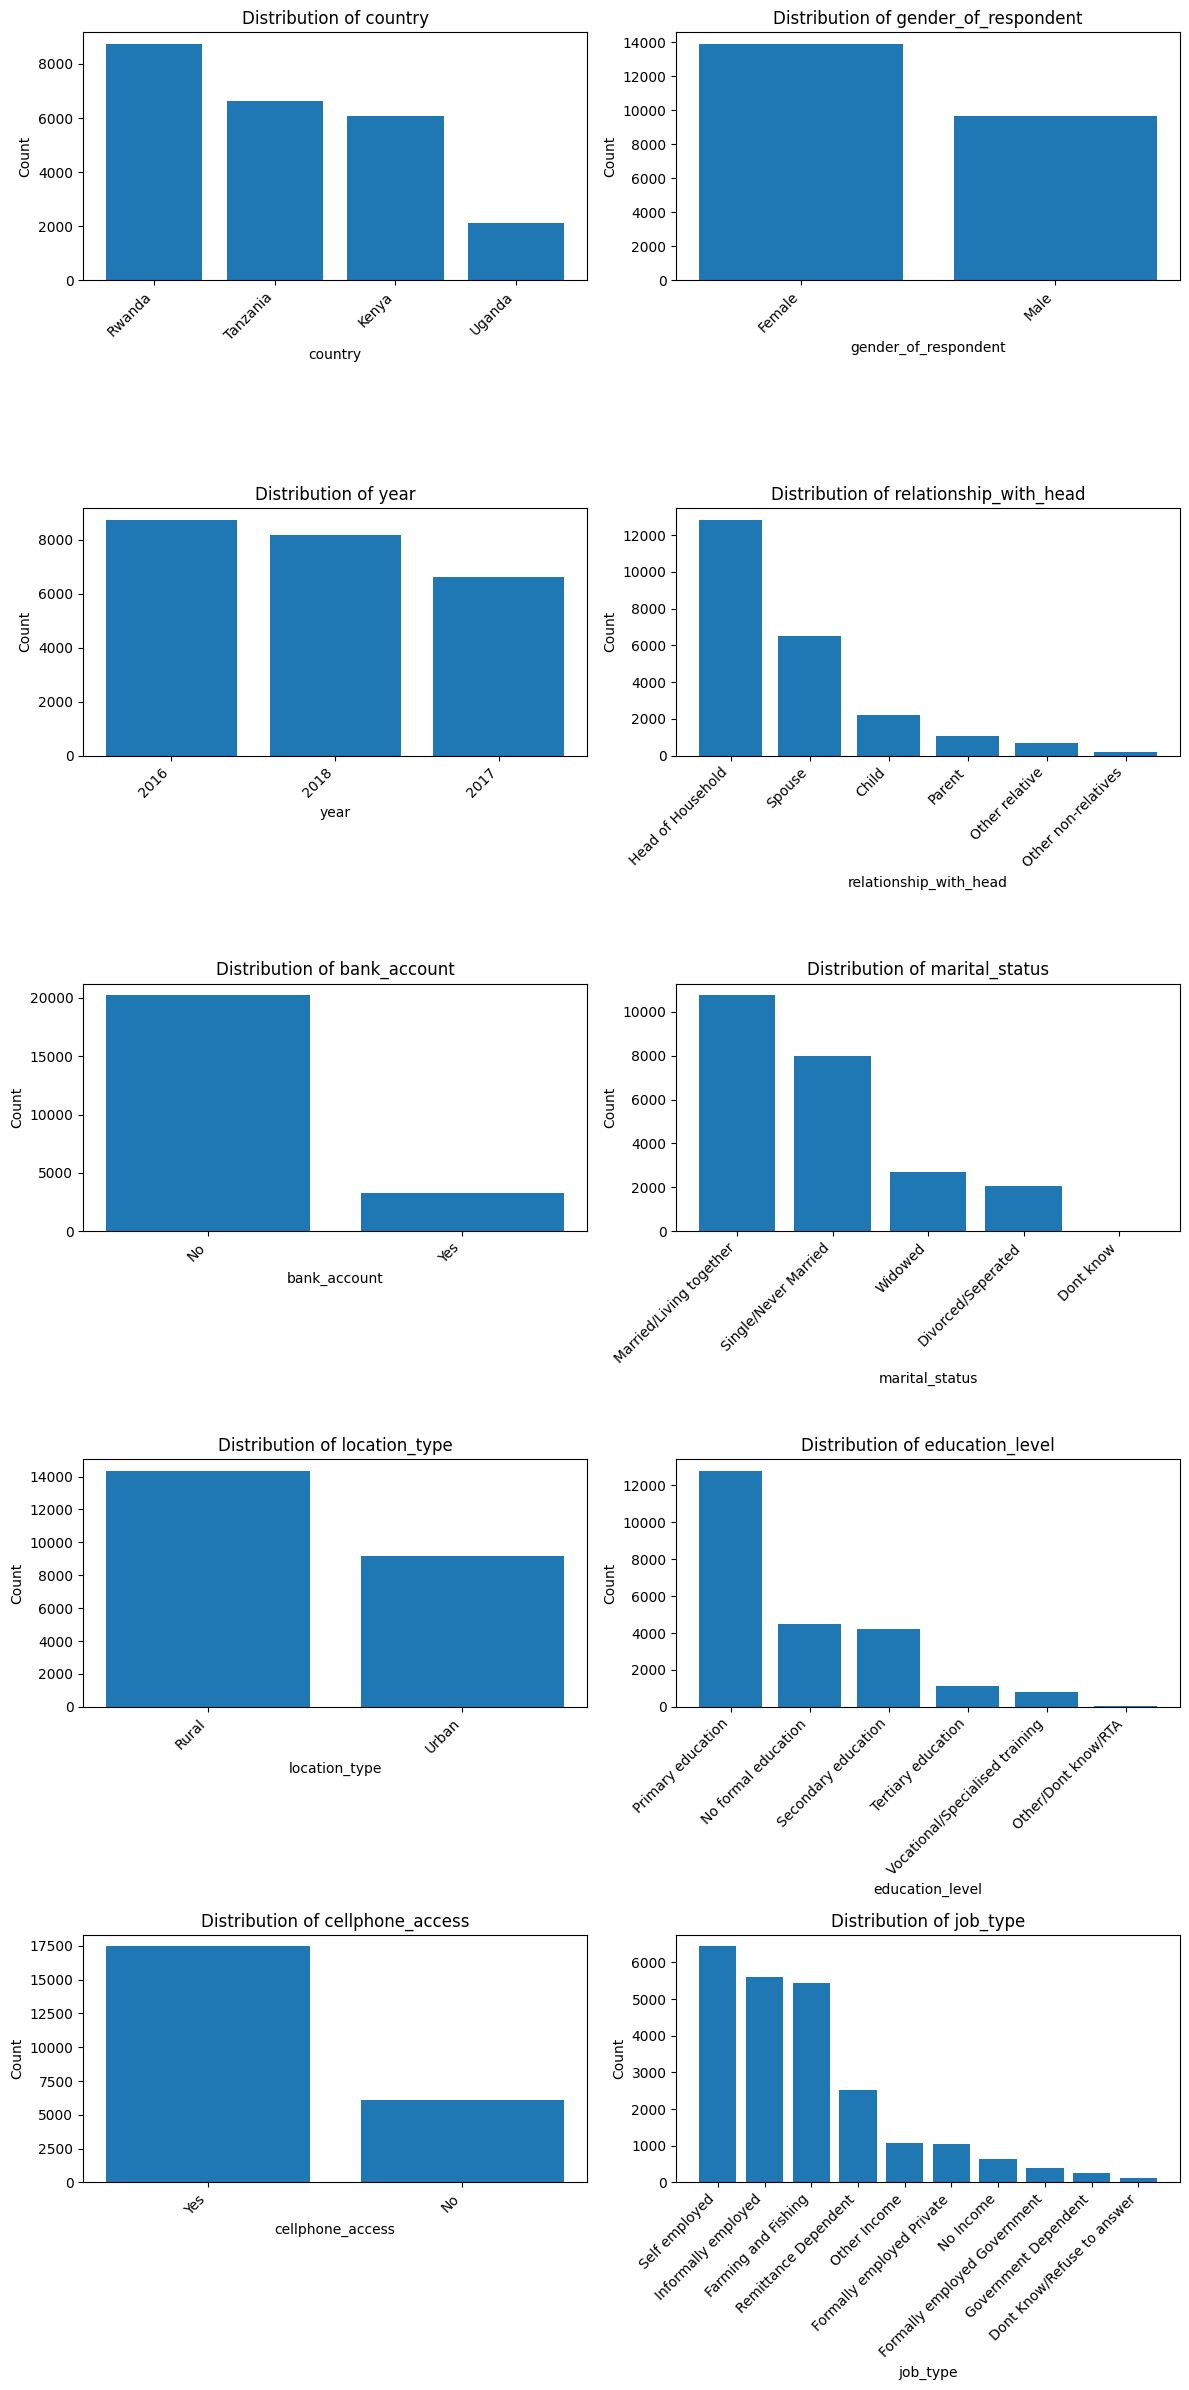

In [24]:
#Creating a way to access the subplots
row = 0
column = 0
#Create the subplots
fig, axs = plt.subplots(5, 2, figsize = (12, 24))


#loop throught the columns of the dataset
for columnname in Categorical.columns:
    #for each column do a value counts
    vc = Categorical[columnname].value_counts()

    #Get the counts and the the values in a seperate list
    x = vc.index.tolist()
    y = vc.values.tolist()


    #Plot a bar chart
    axs[row, column].bar(range(len(x)), y)
    axs[row, column].set_xlabel(columnname)
    axs[row, column].set_ylabel('Count')
    axs[row, column].set_title(f'Distribution of {columnname}') # Added a title to each subplot
    # Set tick locations before setting labels to prevent warnings
    axs[row, column].set_xticks(range(len(x)))
    axs[row, column].set_xticklabels(x, rotation = 45, ha = 'right')

    #Updating the way to access the subplots
    if row >= 4:
        row = 0
        column = 1
    else:
        row +=1


plt.tight_layout()
plt.show()

CONCLUSION (DISTRIBUTION ANALYSIS)
1. Most of the respondants have a house hold of 1-5
2. Most of the respondants are young i.e under 40
3. There were more female than male respondents
4. Most of the data was collected from Rwanda
5. This is an outdated dataset. It was collected 2016-2018, which is at least almost 7 years ago
6. Most of the data was collected from head of households and their spouse.
7. Most of the respondents have no bank account(The Dataset is Imbalanced)
8. Most of the respondents are married
9. Most of the respondents live in rural area
10. Most of them had only up to primary education but were not totally uneducated
11. Most of them had cellphone access
12. Most of them were self employed.


## VARIABLE RELATIONSHIP ANALYSIS

I want to see the relationship between all the variables using heatmap. But most of the data are categorical variables with only two numerical variables. So i'll bin the numerical variable to make it categorical, then create a contingency table and use cramer's V to measure the correlation between the variables

In [25]:
# Creating a new copy dataframe for relationship visualization and bining the numerical variables
relbank = bank.drop(['household_size', 'age_of_respondent'], axis = 1)
relbank['age_of_respondent'] = pd.cut(bank['age_of_respondent'], bins = 5, labels = ['Adolescent', 'Younger Adult', 'Older Adult', 'Elderly', 'Really Old'])
relbank['age_of_respondent'] = pd.cut(bank['age_of_respondent'], bins = 5, labels = ['Small', 'MidSize', 'Large', 'VeryLarge', 'ExtraLarge'])
relbank.head()

,country,year,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_of_respondent
0,Kenya,2018,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed,Small
1,Kenya,2018,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent,VeryLarge
2,Kenya,2018,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,Small
3,Kenya,2018,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,MidSize
4,Kenya,2018,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed,Small


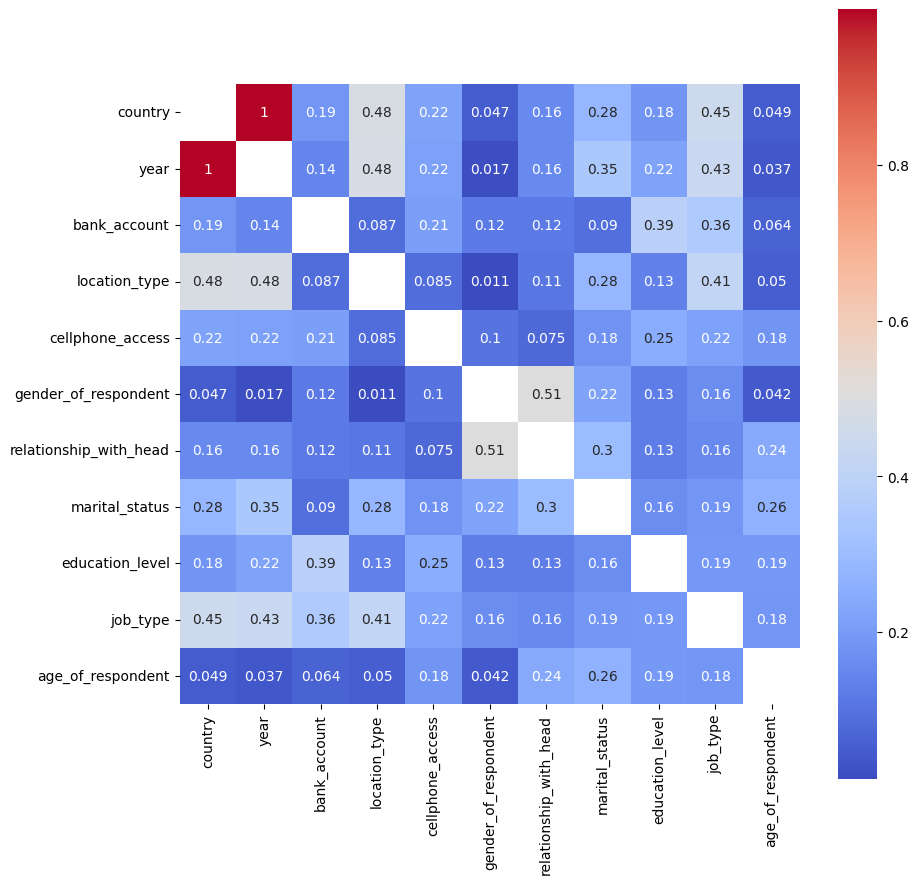

In [26]:
# Please run this column to see the heatmap. I happened to
from scipy.stats import chi2_contingency
corr_matrix = pd.get_dummies(relbank).corr()
cramers_v_matrix = pd.DataFrame(index = relbank.columns, columns = relbank.columns)
for col1 in relbank.columns:
    for col2 in relbank.columns:
        if col1 != col2:
            contingency_table = pd.crosstab(relbank[col1], relbank[col2])
            chi2 = chi2_contingency(contingency_table)[0]
            n = contingency_table.sum().sum()
            r,k = contingency_table.shape
            phi2 = chi2/n
            phi2corr = max(0, phi2-(k-1)*(r-1)/(n-1))
            rcorr = r - ((r-1)**2)/(n-1)
            kcorr = k - ((k-1)**2)/(n-1)
            cramers_v = np.sqrt(phi2corr/ min((kcorr-1), (rcorr-1)))

            cramers_v_matrix.loc[col1, col2] = cramers_v
#display(cramers_v_matrix)
cramers_v_matrix = cramers_v_matrix.apply(pd.to_numeric, errors ='coerce')
plt.figure(figsize=(10, 10))
sns.heatmap(cramers_v_matrix, annot = True, cmap='coolwarm', square = True)
plt.show()

<Axes: xlabel='year', ylabel='count'>

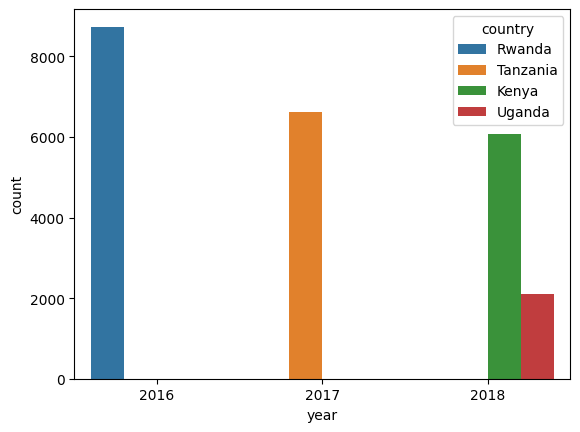

In [27]:
# Checking relationship between country and year in more detail with a countplot
sns.countplot(x = 'year', hue = 'country', data = relbank)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

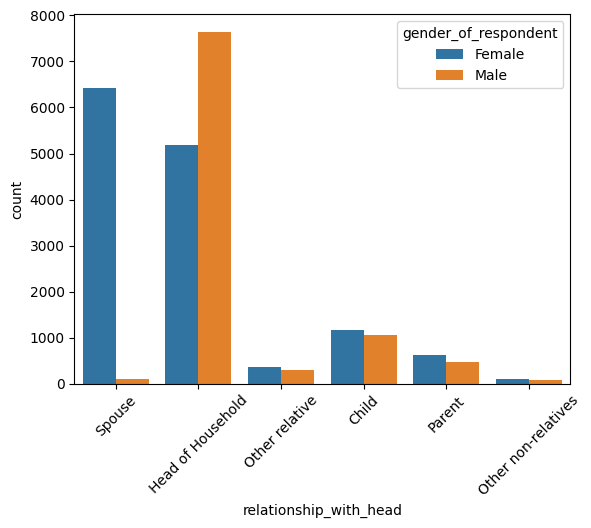

In [28]:
# Checking out the relationship between the feature "relationship_with_head" and the feature "gender of respondent" using a count plot
sns.countplot(x = 'relationship_with_head', hue = 'gender_of_respondent', data = relbank)
plt.xticks(rotation = 45)

CONCLUSION (RELATIONSHIP ANALYSIS)
1. It seems that the correlation of most of the columns with each other is seriously low. There is few exceptions
2. Year and Country is the only two variables with strong correlation. and looking it in more detail with a grouped bar chart. It seems that data was collected in all in the countries in different years except uganda and kenya which were collected in one year(2018).
3. Another notable correlation is the relationship with head to gender. It has a medium correlation. I checked it out in detail, it didn't show much but it does show that mostly when relationship with head is spouse, then its a female respondent, when its head of household, then its a male respondent(This is an expected relationship because a man is mostly the head of households, This correlation does not help our model in any way).
4. There are other notable correlations but they are below average.
5. The bank account variable has low(below average) correlation with most of the variables. But it does have some notable(but still far below average) correlation with jobtype and education level

GENERAL CONCLUSION:
1. All the variables have a weak correlation with bank account.
2. I have concluded that if i want to train this data. I'll train it with the whole variables and then also with a training dataset that has variables with less than 0.2 correlation dropped. I think the later will work better. But i would like to do both. Then compare.

# MODEL DEVELOPEMENT/ EVALUATION

## DEFINING GOAL AND FIXING THE DATA IMBALANCE

1. The Goal: The goal of this model is to be able to accurately predict whether a person has a bank account or not with a great degree of precision. The model should be able to predict each class equally well

2. HOW DATA IMBALANCE WOULD BE TREATED: Our dataset is large and the imbalance in the bank account column is severe (The samples without bank account is far lesser than the account with bank account). So i'll try handling the imbalance by undersampling the No class in the bank account feature

3. I'll experiment on training the model both all the features and on some of the feature with higher with higher than or equal to 0.2 features on the heatmap

In [29]:
# Separate majority and minority classes
df_majority = relbank[relbank.bank_account == 'No']
df_minority = relbank[relbank.bank_account == 'Yes']

# Undersample majority class
df_majority_undersampled = df_majority.sample(n=len(df_minority), random_state=42)

# Combine minority class with undersampled majority class
relbank_balanced = pd.concat([df_majority_undersampled, df_minority])

# Shuffle the balanced dataframe
relbank_balanced = relbank_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Display new class counts
print("Class counts after undersampling:")
print(relbank_balanced.bank_account.value_counts())

# Update relbank to the balanced dataframe
relbank = relbank_balanced.copy()

Class counts after undersampling:
bank_account
No     3312
Yes    3312
Name: count, dtype: int64


In [30]:
from sklearn.preprocessing import OneHotEncoder


relbank['year'] = relbank['year'].astype('object')

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')


x = relbank.drop('bank_account', axis = 1)
y = relbank['bank_account']
columns = x.columns.to_list()

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

encoder.fit(xtrain[columns])

xtrain = encoder.transform(xtrain[columns])
xtest = encoder.transform(xtest[columns])

## TRAINING THE DECISION TREE CLASSIFIER

In [31]:
#Training with all the features
DT = DecisionTreeClassifier(random_state=42)
DT.fit(xtrain,ytrain)
ypred = DT.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print('Accuracy: ' + str(accuracy))
print('Classification Report: ')
print(classification_report(ytest, ypred))
print('Confusion Matrix: ')
print(confusion_matrix(ytest, ypred))

Accuracy: 0.7396226415094339
Classification Report: 
              precision    recall  f1-score   support

          No       0.73      0.76      0.75       665
         Yes       0.75      0.72      0.73       660

    accuracy                           0.74      1325
   macro avg       0.74      0.74      0.74      1325
weighted avg       0.74      0.74      0.74      1325

Confusion Matrix: 
[[508 157]
 [188 472]]


In [32]:
#Training with some features
DT = DecisionTreeClassifier(random_state=42)
DT.fit(xtrain,ytrain)
ypred = DT.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print('Accuracy: ' + str(accuracy))
print('Classification Report: ')
print(classification_report(ytest, ypred))
print('Confusion Matrix: ')
print(confusion_matrix(ytest, ypred))

Accuracy: 0.7396226415094339
Classification Report: 
              precision    recall  f1-score   support

          No       0.73      0.76      0.75       665
         Yes       0.75      0.72      0.73       660

    accuracy                           0.74      1325
   macro avg       0.74      0.74      0.74      1325
weighted avg       0.74      0.74      0.74      1325

Confusion Matrix: 
[[508 157]
 [188 472]]


## TRAINING THE RANDOM FOREST CLASSIFIER

In [33]:
#Training with all the features
RFC = RandomForestClassifier(random_state=42)
RFC.fit(xtrain,ytrain)
ypred = RFC.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print('Accuracy: ' + str(accuracy))
print('Classification Report: ')
print(classification_report(ytest, ypred))
print('Confusion Matrix: ')
print(confusion_matrix(ytest, ypred))

Accuracy: 0.7562264150943396
Classification Report: 
              precision    recall  f1-score   support

          No       0.77      0.74      0.75       665
         Yes       0.75      0.77      0.76       660

    accuracy                           0.76      1325
   macro avg       0.76      0.76      0.76      1325
weighted avg       0.76      0.76      0.76      1325

Confusion Matrix: 
[[493 172]
 [151 509]]


In [34]:
#Training with some of the features
RFC = RandomForestClassifier(random_state=42)
RFC.fit(xtrain,ytrain)
ypred = RFC.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print('Accuracy: ' + str(accuracy))
print('Classification Report: ')
print(classification_report(ytest, ypred))
print('Confusion Matrix: ')
print(confusion_matrix(ytest, ypred))

Accuracy: 0.7562264150943396
Classification Report: 
              precision    recall  f1-score   support

          No       0.77      0.74      0.75       665
         Yes       0.75      0.77      0.76       660

    accuracy                           0.76      1325
   macro avg       0.76      0.76      0.76      1325
weighted avg       0.76      0.76      0.76      1325

Confusion Matrix: 
[[493 172]
 [151 509]]


## USING ARTIFICIAL NEURAL NETWORK

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
relbank['year'] = relbank['year'].astype('object')
x = relbank.drop('bank_account', axis = 1)
y = relbank['bank_account']

In [ ]:
y = y.map({'No': 0, 'Yes': 1})

In [ ]:
X_trainANN, X_testANN, y_trainANN, y_testANN = train_test_split(x, y, test_size=0.2, random_state=42)

encoder.fit(X_trainANN[columns])
X_trainANN = encoder.transform(X_trainANN[columns])
X_testANN = encoder.transform(X_testANN[columns])

In [ ]:
modelANN = Sequential()

modelANN.add(Dense(32, activation='relu', input_shape=(X_trainANN.shape[1],)))
modelANN.add(Dense(16, activation='relu'))
modelANN.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
modelANN.compile( optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = modelANN.fit(X_trainANN.astype(int), y_trainANN, epochs=20, batch_size=32, validation_split=0.2,verbose=1)

Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5827 - loss: 0.6828 - val_accuracy: 0.7434 - val_loss: 0.5562
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7233 - loss: 0.5511 - val_accuracy: 0.7519 - val_loss: 0.5082
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7517 - loss: 0.4942 - val_accuracy: 0.7642 - val_loss: 0.4872
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7652 - loss: 0.4871 - val_accuracy: 0.7613 - val_loss: 0.4710
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7670 - loss: 0.4716 - val_accuracy: 0.7726 - val_loss: 0.4639
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7701 - loss: 0.4660 - val_accuracy: 0.7736 - val_loss: 0.4646
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7743 - loss: 0.4630 - val_accuracy: 0.7594 - val_loss: 0.4621
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7792 - loss: 0.4516 - val_accuracy: 0.

In [ ]:
y_probANN = modelANN.predict(X_testANN.astype(int))
y_predANN = (y_probANN > 0.5).astype(int)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
print("Classification Report for Artificial Neural Network:")
print(classification_report(y_testANN, y_predANN, labels=[0, 1]))

Classification Report for Artificial Neural Network:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       665
           1       0.78      0.79      0.78       660

    accuracy                           0.78      1325
   macro avg       0.78      0.78      0.78      1325
weighted avg       0.78      0.78      0.78      1325



## CONCLUSION

All the models performed fairly well. The goal is to make sure that model predicts whether a person has a bank account or not with an equal great degree of accuracy. This means that the accuracy and the precision should also be high for both the yes and the no classes.

The Artificial Neural Network best archived this goal with a higher accuracy, precision and recall for both classes than the other models

# PROJECT DEPLOYMENT

## SAVING THE MODEL USING PICKLE

In [ ]:
bundle = {
    "FImodel": modelANN,
    "encoder": encoder,
    "columns": columns
}

with open("FImodel.pkl", "wb") as f:
    pickle.dump(bundle, f)

## THE DEPLOYMENT CODE

In [ ]:
# Importing the neccessary Libraries
import pandas as pd
import streamlit as st
import pickle

# Load the model and encoder
with open("FImodel.pkl", "rb") as f:
    bundle = pickle.load(f)

# Creating a function that the predict button will execute to predict if a person has a bank account or not
def predictHasAccount():
    input_data = {
        "country": country_selection,
        "year": str(year_selection),
        "location_type": location_type_selection,
        "cellphone_access": cellphone_access_selection,
        "household_size": household_size_input,
        "age_of_respondent": age_of_respondent_input,
        "gender_of_respondent": gender_of_respondent_selection,
        "relationship_with_head": relationship_with_head_selection,
        "marital_status": marital_status_selection,
        "education_level": education_level_selection,
        "job_type": job_type_selection
    }

    data = pd.DataFrame([input_data])

    for col in data.columns:
        data[col] = data[col].astype("object")

    # Transform the input data using the pre-trained encoder
    data_encoded = bundle["encoder"].transform(data[bundle["columns"]])

    # Make prediction
    pred_prob = bundle["FImodel"].predict(data_encoded)
    pred_value = (pred_prob > 0.5).astype(int)[0][0]

    if pred_value == 1:
        st.write("This Person has a Bank Account")
    else:
        st.write("This Person Doesn't have a Bank Account")


# Creating the Streamlit user interface
st.title("BANK ACCOUNT PREDICTOR")
st.write("Select the correct options that matches the person you want to predict and click predict to see whether they have a bank account or not")

country_selection = st.selectbox('Country', ['Kenya', 'Rwanda', 'Tanzania', 'Uganda'])
year_selection = st.selectbox('Year', [2016, 2017, 2018])
location_type_selection = st.selectbox('Location Type', ['Rural', 'Urban'])
cellphone_access_selection = st.selectbox('Cellphone Access', ['Yes', 'No'])
household_size_input = st.number_input('Household Size', min_value=1, max_value=21, value=3)
age_of_respondent_input = st.number_input('Age of Respondent', min_value=16, max_value=100, value=35)
gender_of_respondent_selection = st.selectbox('Gender of Respondent', ['Female', 'Male'])
relationship_with_head_selection = st.selectbox('Relationship with Head', ['Child', 'Head of Household', 'Other non-relatives', 'Other relative', 'Parent', 'Spouse'])
marital_status_selection = st.selectbox('Marital Status', ['Divorced/Seperated', 'Dont know', 'Married/Living together', 'Single/Never Married', 'Widowed'])
education_level_selection = st.selectbox('Education Level', ['No formal education', 'Other/Dont know/RTA', 'Primary education', 'Secondary education', 'Tertiary education', 'Vocational/Specialised training'])
job_type_selection = st.selectbox('Job Type', ['Dont Know/Refuse to answer', 'Farming and Fishing', 'Formally employed Government', 'Formally employed Private', 'Government Dependent', 'Informally employed', 'No Income', 'Other Income', 'Remittance Dependent', 'Self employed'])


# Prediction button
if st.button('Predict'):

    predictHasAccount()



